Давыдов ПИм-231 12 лаба

Классификация:
(1) загрузите датасет iris (уже использовали при изучении Seaborn),

(2) дайте описание каждого признака и целевой переменной,

(3) как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts().

(4) Разделите данные на признаки и ответы, а затем на обучающую и тестовую выборки.

(5) Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели).

(6) С помощью метода predict_proba получите вероятности принадлежности классам объектов тестовой выборки (вывод оформите в два столбца: значение вероятности, верный ответ).

(7) получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения.

(8) Получите оценки качества классификации: доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения.

(9) Определите 2 признака с наибольшей дисперсией и постройте модель классификации. Сильно ли ухудшились оценки качества модели?

(10) Отобразите наблюдения на плоскости каждый своим цветом. Попробуйте взять в качестве двух признаков длину и ширину лепестков. Как они отобразились на рисунке? Попробуйте взять два признака с наименьшей корреляцией.

(11) Модель LogisticRegression для классификации использует стратегию один против всех в случае нескольких классов. Постарайтесь отобразить на графике наблюдения (каждый класс своим цветом) и гиперплоскости (в 2Д - прямые), разделяющие эти классы. Можно использовать принцип построения линий уровня для функции 2-х перемнных (см. прилагаемые материалы).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.metrics import classification_report

(1) загрузите датасет iris (уже использовали при изучении Seaborn),

In [ ]:
data = sb.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


(2) дайте описание каждого признака и целевой переменной,

4 признака и целевой столбец species

(3) как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts().

In [ ]:
species_values = data['species'].value_counts()
print(species_values)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


In [ ]:
data['species'] = data['species'].replace(['setosa', 'versicolor', 'virginica'],['0', '1', '2'])

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
species_values = data['species'].value_counts()
print(species_values)

0    50
1    50
2    50
Name: species, dtype: int64


Наблюдения имеются в одинаковом количестве, по 50 штук для каждого вида цветочка.

Я для работы сделал обозначения с помощью цифр, для каждого типа цветочка.

(4) Разделите данные на признаки и ответы, а затем на обучающую и тестовую выборки.

In [ ]:
X = data.drop(columns=['species'])
y = data['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(5) Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели).

In [ ]:
model = LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1)

(6) С помощью метода predict_proba получите вероятности принадлежности классам объектов тестовой выборки (вывод оформите в два столбца: значение вероятности, верный ответ).

In [ ]:
predicted_probabilities = model.predict_proba(X_test)
proba_rounded = np.round(predicted_probabilities, 2)
right = y_test
df_proba = pd.DataFrame(proba_rounded, columns=[f'Вероятность класса {cls}' for cls in model.classes_])
df_proba['Actual'] = right.values

df_proba

,Вероятность класса 0,Вероятность класса 1,Вероятность класса 2,Actual
0,0.00,0.81,0.18,1
1,0.94,0.06,0.00,0
2,0.00,0.00,1.00,2
3,0.01,0.77,0.22,1
4,0.00,0.75,0.25,1
5,0.95,0.05,0.00,0
6,0.08,0.90,0.02,1
7,0.00,0.15,0.85,2
8,0.00,0.78,0.22,1
9,0.03,0.94,0.03,1


(7) получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения.

In [ ]:
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

Модель всё правильно предсказала.

(8) Получите оценки качества классификации: доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



(9) Определите 2 признака с наибольшей дисперсией и постройте модель классификации.

Сильно ли ухудшились оценки качества модели?

In [ ]:
data.var()

<ipython-input-59-6bf595b3cfe5>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

2 признака с наибольшей дисперсией: sepal_length, petal_length

Возьмем только эти столбцы для X

In [ ]:
data = sb.load_dataset('iris')
data['species'] = data['species'].replace(['setosa', 'versicolor', 'virginica'],['0', '1', '2'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = data.drop(columns=['species', 'sepal_width', 'petal_width'])
y = data['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_var = LogisticRegression(penalty='l2', C=1)
model_var.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
y_pred = model_var.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

Ничего не поменялось.

(10) Отобразите наблюдения на плоскости каждый своим цветом. Попробуйте взять в качестве двух признаков длину и ширину лепестков. Как они отобразились на рисунке? Попробуйте взять два признака с наименьшей корреляцией.

0    50
1    50
2    50
Name: species, dtype: int64


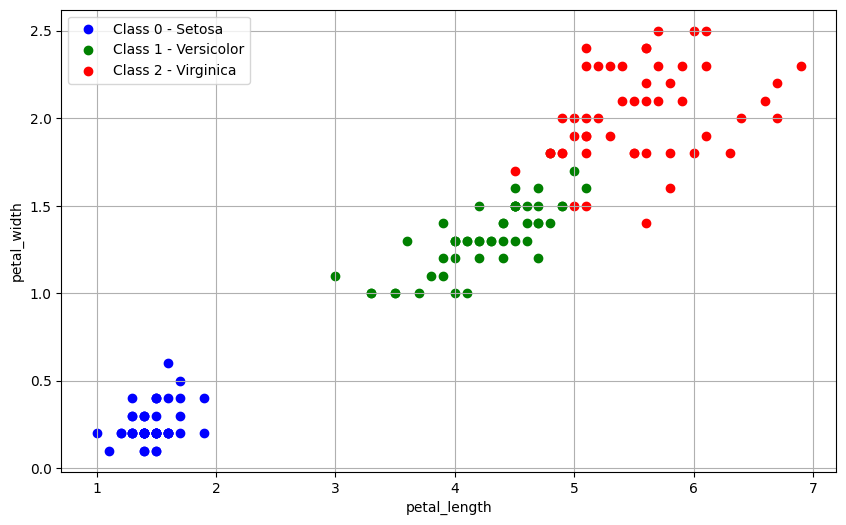

In [ ]:
data = sb.load_dataset('iris')
data['species'] = data['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
species_values = data['species'].value_counts()

print(species_values)

plt.figure(figsize=(10, 6))
plt.scatter(data[data["species"] == 0]["petal_length"], data[data["species"] == 0]["petal_width"], c='b', label="Class 0 - Setosa")
plt.scatter(data[data["species"] == 1]["petal_length"], data[data["species"] == 1]["petal_width"], c='g', label="Class 1 - Versicolor")
plt.scatter(data[data["species"] == 2]["petal_length"], data[data["species"] == 2]["petal_width"], c='r', label="Class 2 - Virginica")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.grid(True)
plt.show()


(11) Модель LogisticRegression для классификации использует стратегию один против всех в случае нескольких классов. Постарайтесь отобразить на графике наблюдения (каждый класс своим цветом) и гиперплоскости (в 2Д - прямые), разделяющие эти классы. Можно использовать принцип построения линий уровня для функции 2-х перемнных (см. прилагаемые материалы).

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


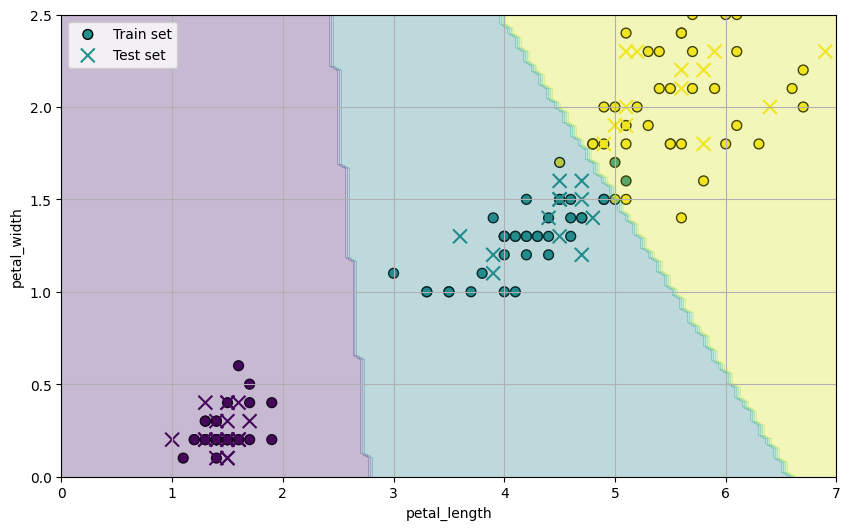

In [ ]:
data = sb.load_dataset('iris')
data['species'] = data['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

X = data.drop(columns=['species', 'sepal_width', 'sepal_length'])
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)


plt.figure(figsize=(10, 6))
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50, label='Train set')
plt.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Test set')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

# Гиперплоскость
xx, yy = np.meshgrid(np.linspace(0, 7, 100), np.linspace(0, 2.5, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()


**Вы не представляете, как долго я с этим мучался!**